In [8]:
import cv2
from IPython.display import Image, display
import numpy as np
import glob
import pandas as pd

def imshow(img):
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

df = pd.read_csv("../../circle_detection/scripts/Image_Size.csv")

In [11]:
i = 339
picture_path = df.iat[i,0]
print(picture_path)

194_20130603_121329_l_カラー眼底.png


In [12]:
path = "../../storage/data/" + picture_path[:-3] + "jpg"
img = cv2.imread(path)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(cimg,cv2.HOUGH_GRADIENT,1.1,70,
                            param1=100,param2=60,minRadius=0,maxRadius=0
                            )
print(circles)

[[[1025.75  607.75  855.36]]]


1025.75


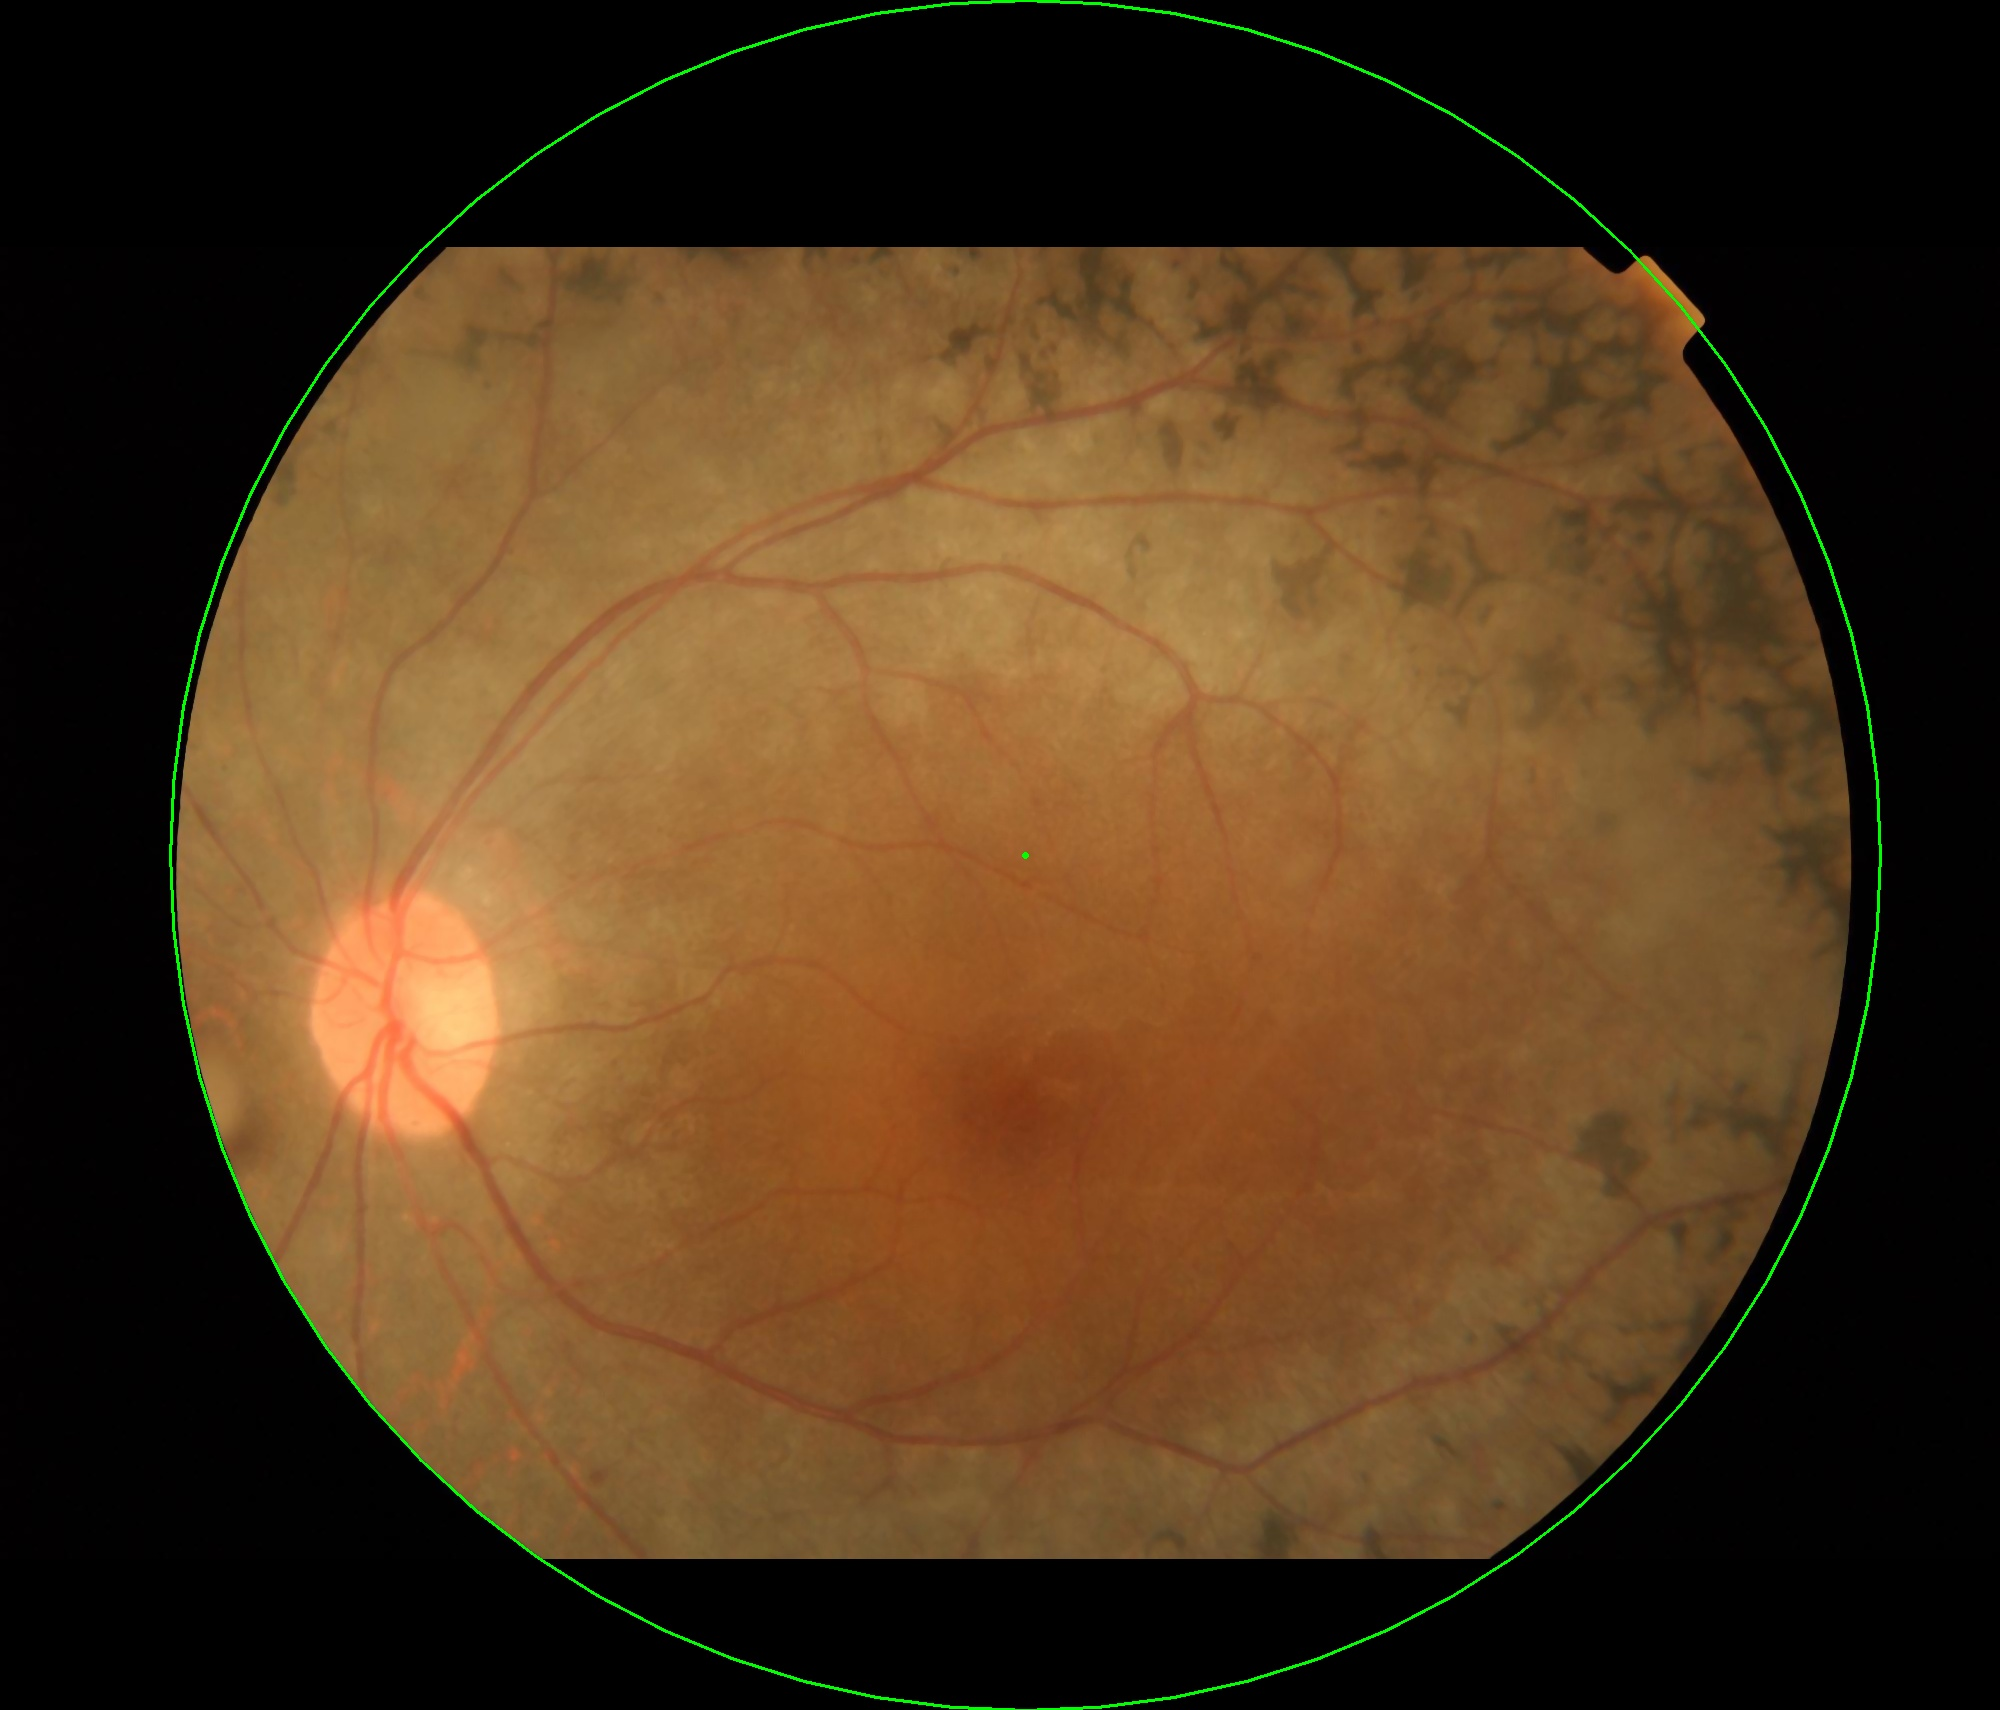

In [13]:
cx, cy, r = circles[0][0]

print(cx)
# caliculate circle 
target_height = r*2

height,width = img.shape[:2]

target_size = (target_height,width) #src size < dst sizeの前提

top = int(r-cy)
bottom = int(target_size[0] - height - top)
left = int((target_size[1] - width)/2)
right = int(target_size[1] - width - left)

color = (0,0,0)
img_filled = cv2.copyMakeBorder(img, top, bottom, left, right,cv2.BORDER_CONSTANT,value=color)

cx = int(cx)
cy = int(cy)
r = int(r)
# Write Circle
cv2.circle(img_filled, (cx, r), r, (0, 255, 0), 2)
# Write Center
cv2.circle(img_filled, (cx, r), 2, (0, 255, 0), 2)
imshow(img_filled)